<a href="https://colab.research.google.com/github/abdul987a/Machine-Learning/blob/main/Submission_Abdul_Rohman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library yang dibutuhkan**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.4.1


**Download dataset gambar guting, batu dan kertas dengan background hijau**

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**install libray split-folders**

In [ ]:
pip install split-folders

In [ ]:
pip install split-folders tqdm

In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/hasil_split", seed=1337, ratio=(.8, .2)) # default values

Copying files: 2188 files [00:00, 4607.62 files/s]


In [ ]:
base_dir = '/tmp/rockpaperscissors/hasil_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/rockpaperscissors/hasil_split/train')

['paper', 'rock', 'scissors']

In [ ]:
# membuat direktori paper,scissors dan rock  pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

train_scissors_dir = os.path.join(train_dir, 'scissors')

train_rock_dir = os.path.join(train_dir, 'rock')


# membuat direktori paper,scissors dan rock  pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

validation_scissors_dir = os.path.join(validation_dir, 'scissors')

validation_rock_dir = os.path.join(validation_dir, 'rock')

**ImageDatagenerator untuk melakukan ekstraksi data yang berupa images/citra digital, yang berasal dari sebuah folder menjadi sebuah array yang dapat dibaca oleh tensorflow,**

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
#'nearest'

In [ ]:
train_generator = train_datagen.flow_from_directory(
                  train_dir,  # direktori data latih
                  target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
                  batch_size=32,
                  class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                       validation_dir, # direktori data validasi
                       target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
                       batch_size=32, 
                       class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


**fungsi Dropout untuk mengurangi Overfitting, dan  Overfitting adalah suatu keadaan dimana data yang digunakan untuk pelatihan itu adalah yang "terbaik". Sehingga apabila dilakukan tes dengan menggunakan data yang berbeda dapat mengurangi akurasi**

In [ ]:

from keras.layers import Dropout

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(3, activation='softmax')        
        
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

**penggunaan categorical_crossentropy**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

**fungsi di bawah ini adalah jika val_lossnya sudah memnuhi ketentuan minimum, yaitu kurang dari sama dengan 0.018 maka akan otomatis berhenti proses validasinya.**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.018):
      print("\nReached validation loss < 1.8% so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

Epoch 1/40
35/35 - 40s - loss: 0.9520 - accuracy: 0.5277 - val_loss: 0.7158 - val_accuracy: 0.7688
Epoch 2/40
35/35 - 8s - loss: 0.4661 - accuracy: 0.8305 - val_loss: 0.4606 - val_accuracy: 0.8375
Epoch 3/40
35/35 - 8s - loss: 0.2849 - accuracy: 0.8999 - val_loss: 0.3520 - val_accuracy: 0.8875
Epoch 4/40
35/35 - 8s - loss: 0.2260 - accuracy: 0.9288 - val_loss: 0.3288 - val_accuracy: 0.8938
Epoch 5/40
35/35 - 7s - loss: 0.1549 - accuracy: 0.9446 - val_loss: 0.1834 - val_accuracy: 0.9500
Epoch 6/40
35/35 - 8s - loss: 0.1854 - accuracy: 0.9330 - val_loss: 0.0847 - val_accuracy: 0.9812
Epoch 7/40
35/35 - 8s - loss: 0.1236 - accuracy: 0.9563 - val_loss: 0.2958 - val_accuracy: 0.9000
Epoch 8/40
35/35 - 7s - loss: 0.0983 - accuracy: 0.9630 - val_loss: 0.2860 - val_accuracy: 0.9250
Epoch 9/40
35/35 - 8s - loss: 0.1409 - accuracy: 0.9491 - val_loss: 0.1742 - val_accuracy: 0.9375
Epoch 10/40
35/35 - 8s - loss: 0.0853 - accuracy: 0.9748 - val_loss: 0.2331 - val_accuracy: 0.9125
Epoch 11/40
35/35 

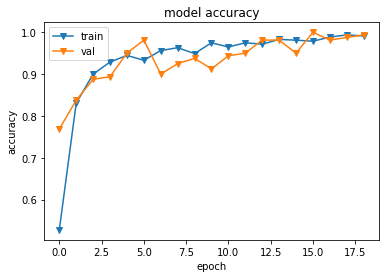

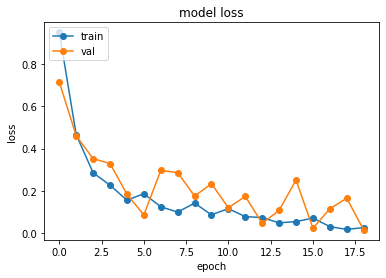

In [ ]:

history = model.fit(
                    train_generator,
                    steps_per_epoch=35,  # berapa batch yang akan dieksekusi pada setiap epoch
                    epochs=40,
                    callbacks=[callbacks],
                    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
                    validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
                    verbose=2
                )
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'], marker='v')
plt.plot(history.history['val_accuracy'], marker='v')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving 9JYn3D5vkXtrasPJ.png to 9JYn3D5vkXtrasPJ.png
9JYn3D5vkXtrasPJ.png
rock


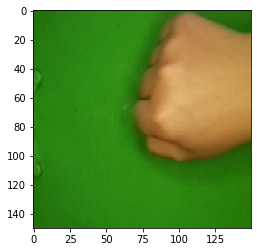

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  apajadinya = np.argmax(classes)

  print(fn)
  if apajadinya==0:
    print('paper')
  elif apajadinya==1:
    print('rock')
  elif apajadinya==2:
    print('scissors')

dimana untuk penebakan gambar sudah tepat karna hasilnya yang didapatkan adalah rock/batu